# Analysis and visualisation of results

In [9]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import helpers as h

In [10]:
data_path = "../results/valid_tests_1"
encryption_methods = ["ASCON", "masked_ASCON", "AES-GCM", "NONE"]
metrics = ["RTT", "S_PROC", "R_PROC", "DS_PROC", "DS_ENC", "DS_DEC","GW_US_PROC", "GW_DS_PROC", "ENC", "DEC"]
scenarios = 12


paths = {}
for encryption_method in encryption_methods:
    if encryption_method not in paths:
        paths[encryption_method] = []
    for i in range(1,scenarios+1):
        path = os.path.join(data_path, encryption_method, f"{encryption_method}_scen{i}")
        paths[encryption_method].append(path)

In [11]:
frames = {}

for encryption_method in encryption_methods:
    if encryption_method not in frames:
        frames[encryption_method] = []
    for i in range(0,scenarios):
        frames[encryption_method].append(h.load_and_merge_logs(paths[encryption_method][i]))

No files found in ../results/valid_tests_1/masked_ASCON/masked_ASCON_scen8.
Removed 1 rows with NaN values from ../results/valid_tests_1/AES-GCM/AES-GCM_scen11.
Removed 1 rows with zero values from ../results/valid_tests_1/AES-GCM/AES-GCM_scen11.
Removed 1 rows where Start_Time > End_Time from ../results/valid_tests_1/AES-GCM/AES-GCM_scen11.
Removed 1 rows where Start_Time > End_Time from ../results/valid_tests_1/AES-GCM/AES-GCM_scen12.


In [12]:
def add_hw_and_networking_time(frames):
    for encryption_method in encryption_methods:
        for i in range(0, scenarios):
            try:
                frames[encryption_method][i]["HW_and_Network_Delta"] = frames[encryption_method][i]["RTT_Delta"] - frames[encryption_method][i]["S_PROC_Delta"]
                - frames[encryption_method][i]["R_PROC_Delta"] - frames[encryption_method][i]["GW_DS_PROC_Delta"] - frames[encryption_method][i]["GW_US_PROC_Delta"]
                - frames[encryption_method][i]["DS_PROC_Delta"]
                frames[encryption_method][i]["%_of_RTT_Delta"] = frames[encryption_method][i]["HW_and_Network_Delta"] / frames[encryption_method][i]["RTT_Delta"]
            except Exception as e:
                if frames[encryption_method][i] is not None:
                    frames[encryption_method][i]["HW_and_Network_Delta"] = 0
add_hw_and_networking_time(frames)

In [13]:
# h.get_stats(frames, 1, "RTT")
frames["masked_ASCON"][9].columns

Index(['RTT_Delta', 'S_PROC_Delta', 'R_PROC_Delta', 'DS_PROC_Delta',
       'DS_ENC_Delta', 'DS_DEC_Delta', 'GW_US_PROC_Delta', 'GW_DS_PROC_Delta',
       'ENC_Delta', 'DEC_Delta', 'HW_and_Network_Delta', '%_of_RTT_Delta'],
      dtype='object')

In [14]:
h.get_encryption_stats(frames, "ASCON", "HW_and_Network")

,Mean_HW_and_Network,Std_HW_and_Network
0,241646.23,82646.158774
1,241354.69,86150.124287
2,246755.42,84893.131600
3,231195.08,79640.847027
4,245288.79,85993.706895
5,235147.10,82297.517286
6,0.00,0.000000
7,255079.25,74919.985645
8,243591.58,112050.689246
9,225903.68,77876.633050


Saved RTT
Saved S_PROC
Saved R_PROC
Saved DS_PROC
Saved DS_ENC
Saved DS_DEC
Saved GW_US_PROC
Saved GW_DS_PROC
Saved ENC
Saved DEC
Saved HW_and_Network
Saved %_of_RTT


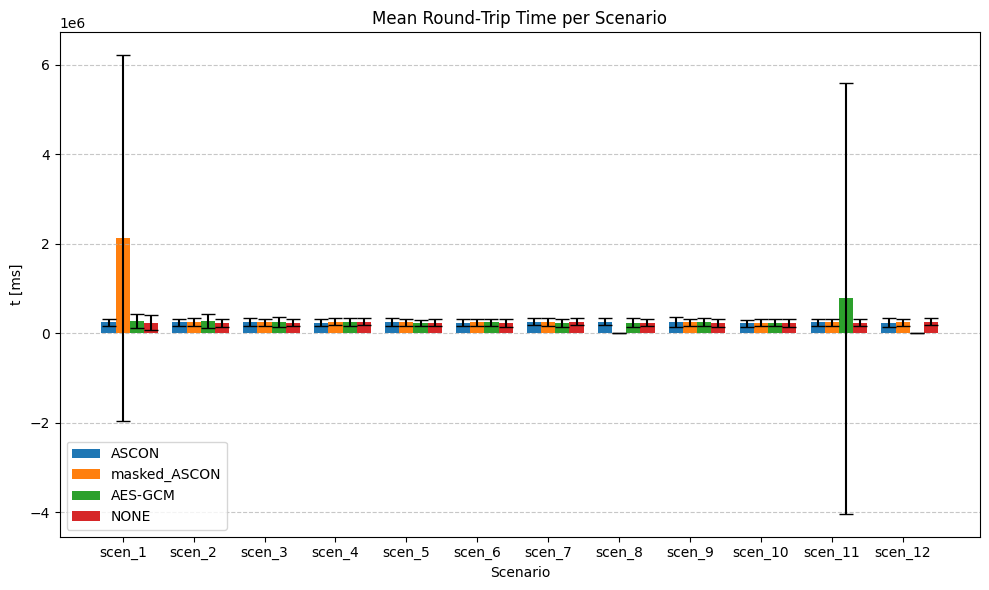

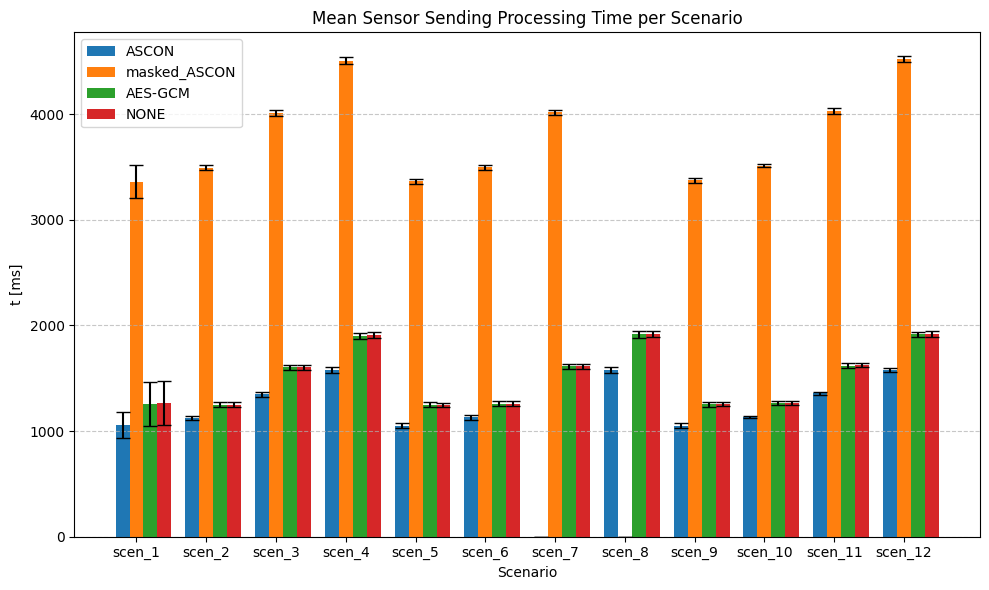

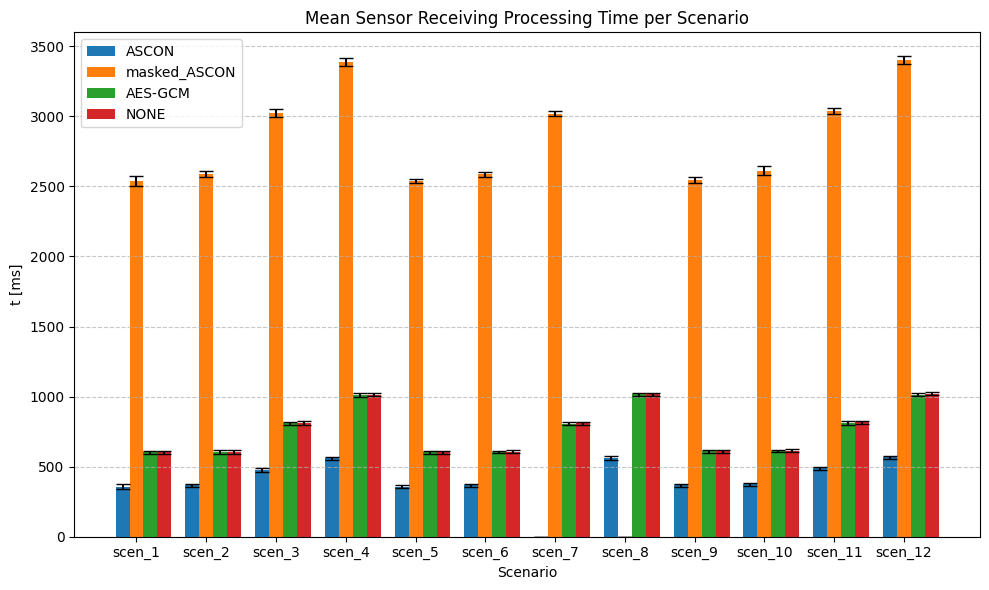

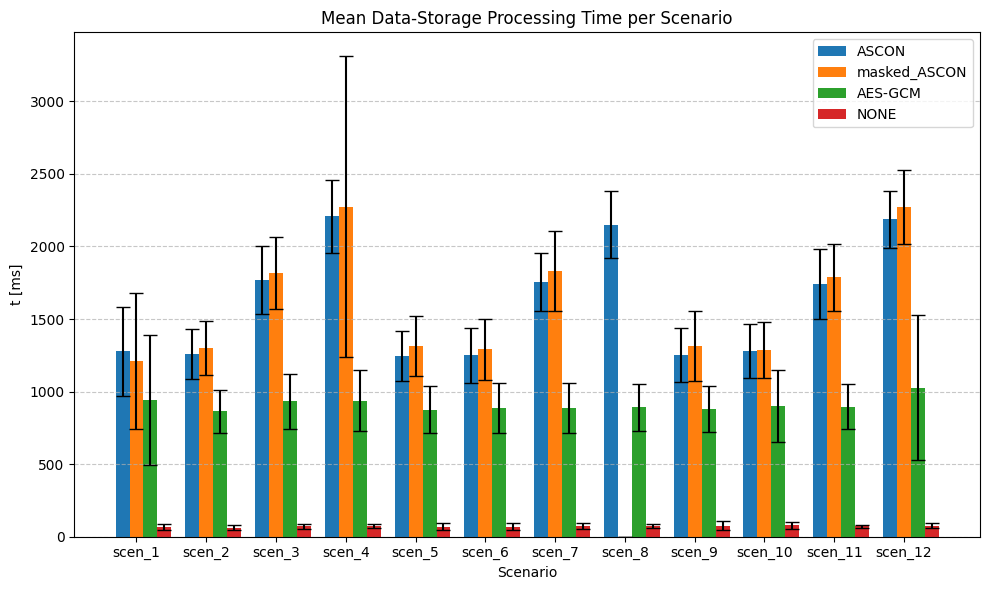

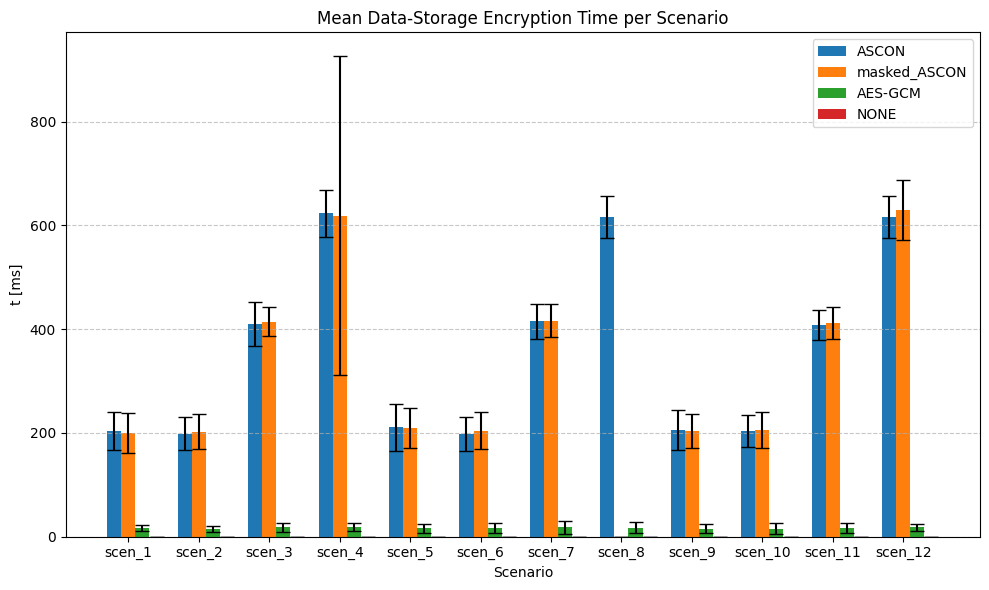

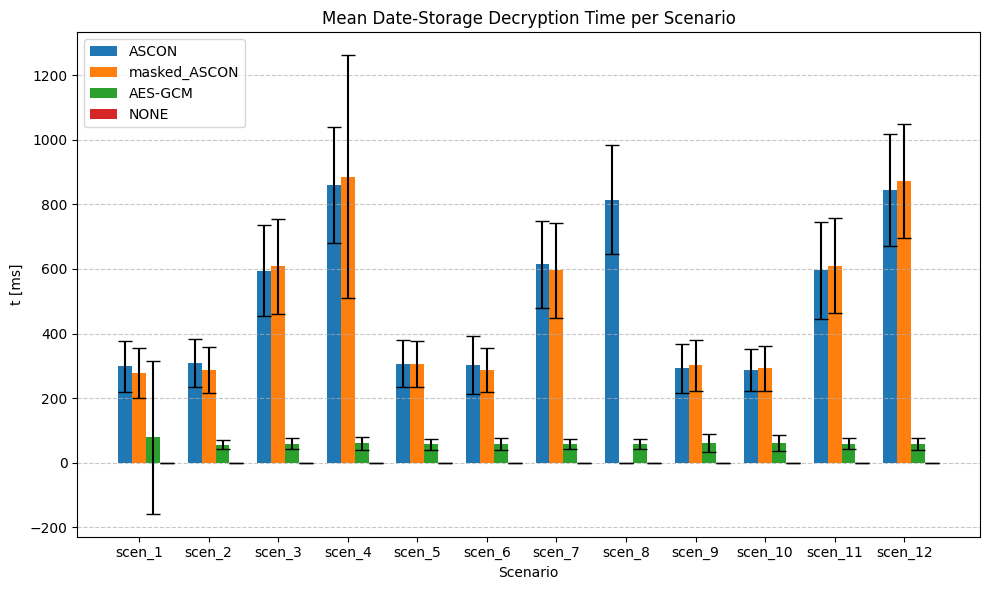

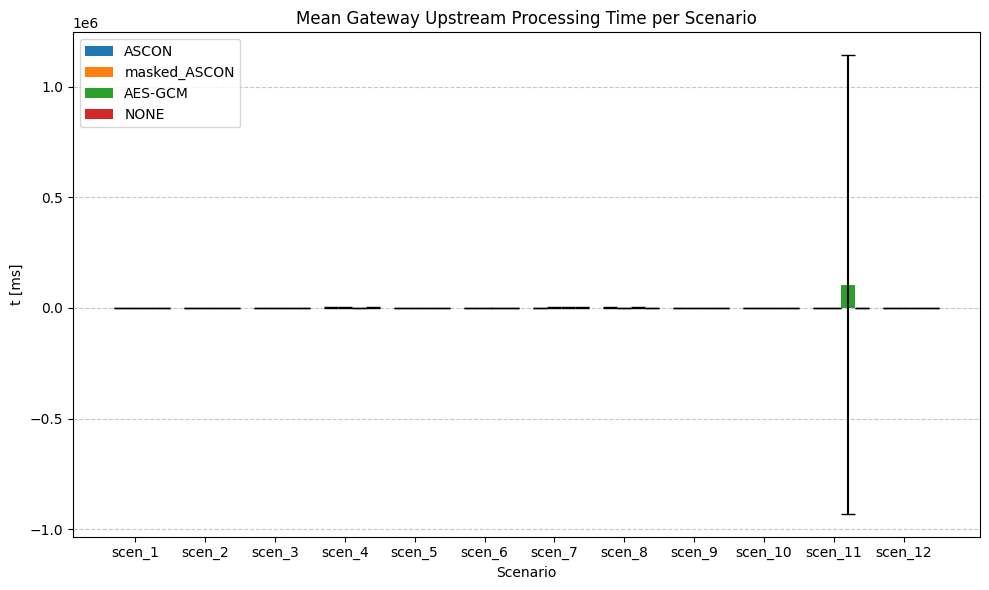

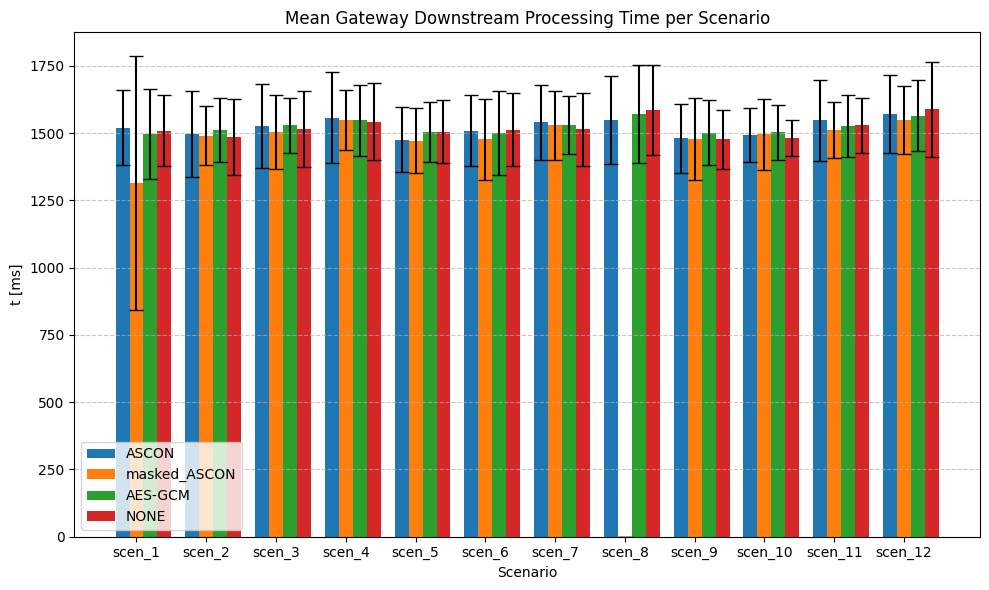

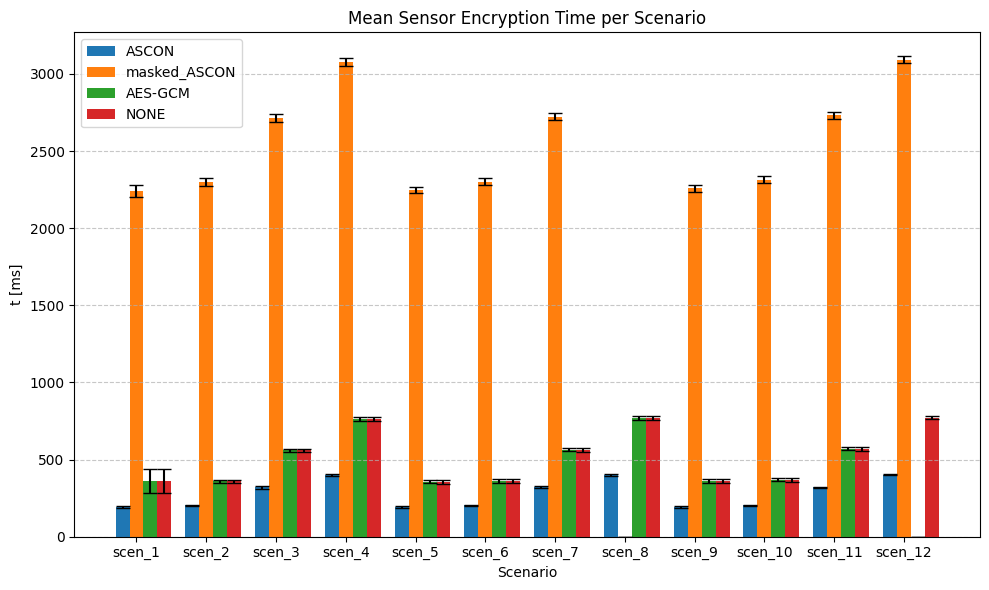

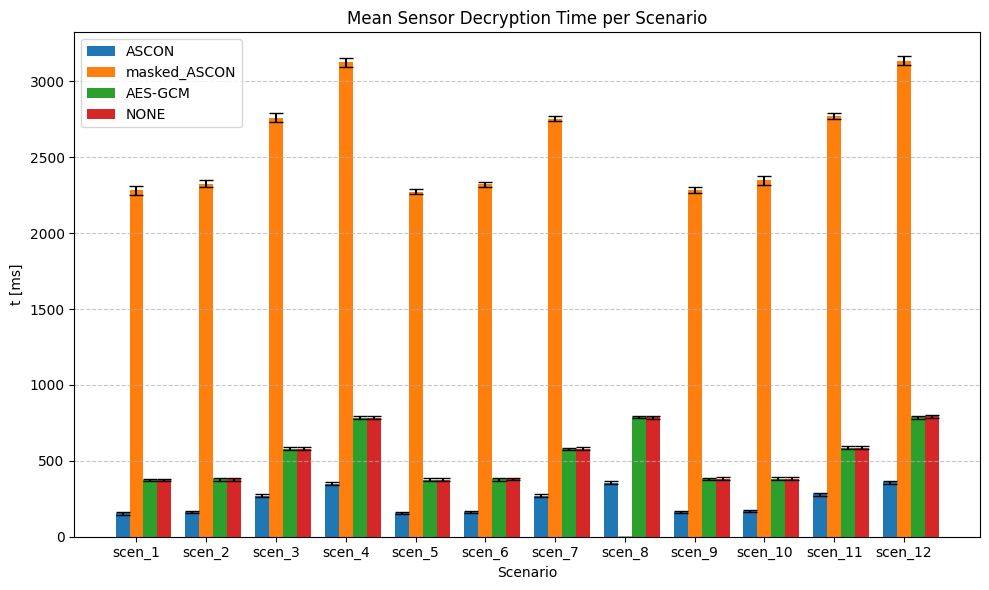

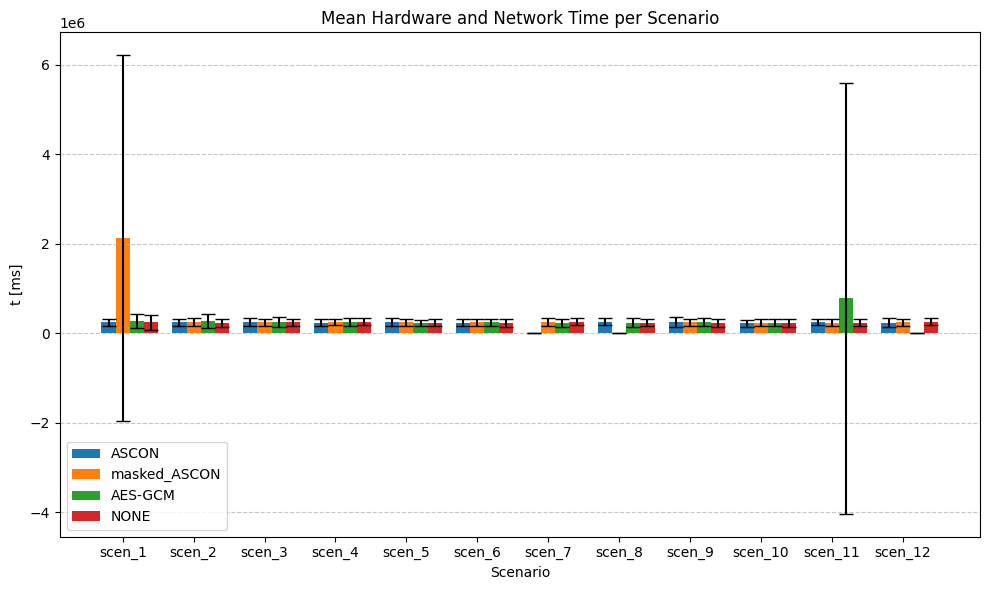

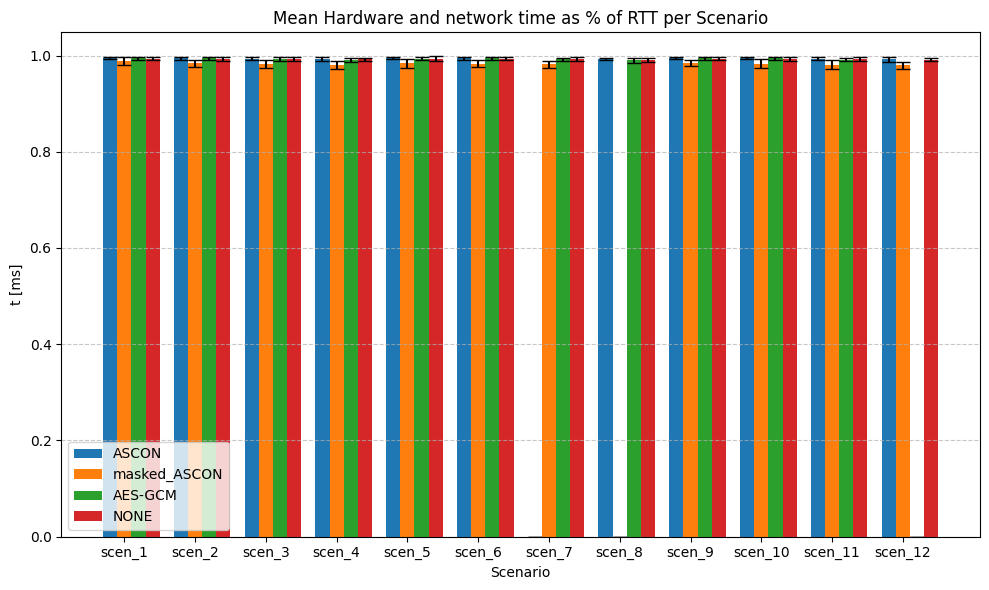

In [15]:
figure_path = os.path.join("..", "figures", "means_bar_plot")
h.save_figure(frames, figure_path)

In [16]:
h.get_stats(frames, 11, "DS_DEC")

,Method,Mean_DS_DEC,Std_DS_DEC
0,ASCON_DS_DEC,596.030000,150.695187
1,masked_ASCON_DS_DEC,609.520000,146.799284
2,AES-GCM_DS_DEC,59.464646,16.046052
3,NONE_DS_DEC,0.000000,0.000000
